In [1]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from traffic.core import Traffic
from traffic.core.projection import EuroPP

import matplotlib.pyplot as plt

In [2]:
traffic = Traffic.from_file("../deep_traffic_generation/data/traffic.pkl")
traffic

/home/adrien/.conda/envs/traffic/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
flight_id,
2FPLF_000,200
SWR2291_12969,200
SWR2291_12976,200
SWR2291_12975,200
SWR2291_12974,200
SWR2291_12973,200
SWR2291_12972,200
SWR2291_12971,200
SWR2291_12970,200


In [3]:
t_dbscan = traffic.clustering(
    nb_samples=None,
    features=["x", "y", "track_unwrapped", "groundspeed", "altitude"],
    clustering=DBSCAN(eps=2.3, min_samples=10),
    transform=MinMaxScaler(feature_range=(-1, 1)),
).fit_predict()

/home/adrien/.conda/envs/traffic/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
dict(t_dbscan.groupby(["cluster"]).agg({"flight_id": "nunique"}).flight_id)

/home/adrien/.conda/envs/traffic/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{-1: 2037,
 0: 594,
 1: 429,
 2: 2684,
 3: 294,
 4: 324,
 5: 4048,
 6: 54,
 7: 1756,
 8: 108,
 9: 470,
 10: 3281,
 11: 972,
 12: 8,
 13: 81,
 14: 737,
 15: 508,
 16: 259,
 17: 283,
 18: 36,
 19: 121,
 20: 38,
 21: 141,
 22: 92,
 23: 25,
 24: 24,
 25: 13,
 26: 16,
 27: 24}

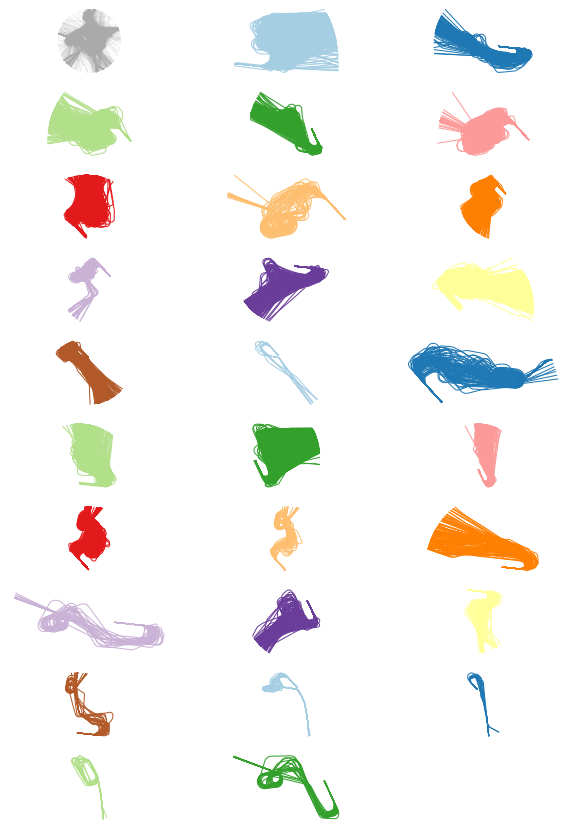

In [5]:
from itertools import islice, cycle
# from traffic.drawing import countries

n_clusters = 1 + t_dbscan.data.cluster.max()

# -- dealing with colours --

color_cycle = cycle(
    "#a6cee3 #1f78b4 #b2df8a #33a02c #fb9a99 #e31a1c "
    "#fdbf6f #ff7f00 #cab2d6 #6a3d9a #ffff99 #b15928".split()
)
colors = list(islice(color_cycle, n_clusters))
colors.append("#aaaaaa")  # color for outliers, if any

# -- dealing with the grid --

nb_cols = 3
nb_lines = (1 + n_clusters) // nb_cols + (((1 + n_clusters) % nb_cols) > 0)

with plt.style.context("traffic"):

    fig, ax = plt.subplots(
        nb_lines, nb_cols, figsize=(10, 15), subplot_kw=dict(projection=EuroPP())
    )

    for cluster in range(-1, n_clusters):
        ax_ = ax[(cluster + 1) // nb_cols][(cluster + 1) % nb_cols]
        # ax_.add_feature(countries())

        t_dbscan.query(f"cluster == {cluster}").plot(
            ax_, color=colors[cluster], alpha=0.1 if cluster == -1 else 1
        )
        # ax_.set_global()

In [6]:
t = t_dbscan.query("cluster != -1")
t

/home/adrien/.conda/envs/traffic/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
flight_id,
9AJIM_002,200
SWR243_13066,200
SWR243_13073,200
SWR243_13071,200
SWR243_13070,200
SWR243_13069,200
SWR243_13068,200
SWR243_13067,200
SWR243_13065,200


In [8]:
t.query("cluster == 7").to_pickle("../deep_traffic_generation/data/traffic_7.pkl")

/home/adrien/.conda/envs/traffic/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
